# Project 1
### Iyad Elwy - #5000256


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">

<h1 style='background:#001664; border:0; border-radius: 10px; color:white;padding:30px'><center> Plan </center></h1>


### [**1. Data Visualization & EDA**](#title-one)

### [**2. Data Preprocessing**](#title-two)

### [**3. ML Models & Evaluation**](#title-three)

### [**4. Final Results**](#title-four)

### [**5. Saving and Testing Model**](#title-five)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)


In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<a id="title-one"></a>
<h1 style='background:#001664; border:2; border-radius: 10px; color:white;padding:30px'><center>Data Visualization & EDA</center></h1>

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


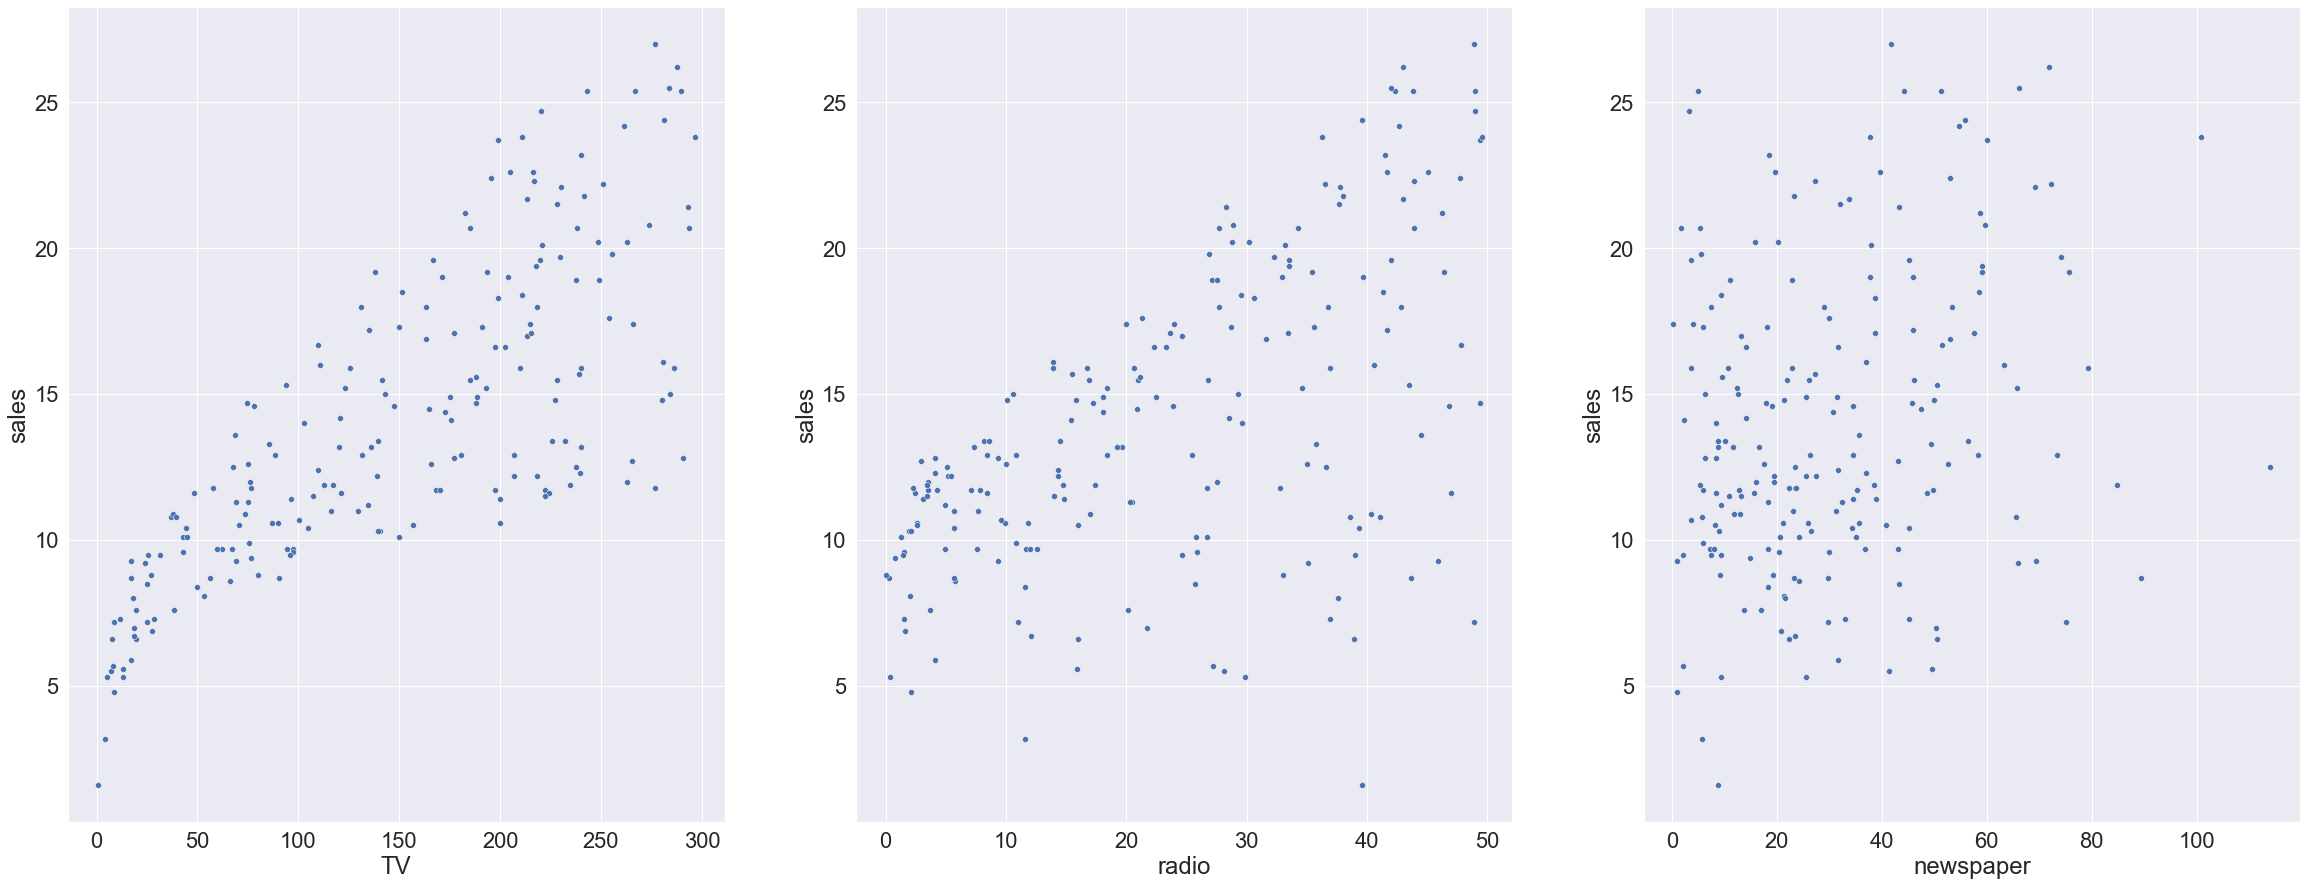

In [5]:
plt.figure(figsize=(40, 15))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['TV'], y=df['sales']);
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['radio'], y=df['sales']);
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['newspaper'], y=df['sales']);

<a id="title-two"></a>
<h1 style='background:#001664; border:2; border-radius: 10px; color:white;padding:30px'><center>Data Preprocessing </center></h1>

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['sales'], axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, shuffle=True)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

<a id="title-three"></a>
<h1 style='background:#001664; border:2; border-radius: 10px; color:white;padding:30px'><center>ML Models & Evaluation </center></h1>

In [8]:
# create
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


def get_eval_metrics(model, _X_train, _X_test, _y_train, _y_test, for_test_set=True) -> tuple:
    """
    :param model: The model to do predictions on
    :param for_test_set: If eval for test set or train set
    :return: mae, mse, mrse
    :rtype: tuple
    """
    if for_test_set:
        y_pred = model.predict(_X_test)
        mae = mean_absolute_error(y_true=_y_test, y_pred=y_pred)
        mse = mean_squared_error(y_true=_y_test, y_pred=y_pred)
        mrse = math.sqrt(mse)
    else:
        y_pred = model.predict(_X_train)
        mae = mean_absolute_error(y_true=_y_train, y_pred=y_pred)
        mse = mean_squared_error(y_true=_y_train, y_pred=y_pred)
        mrse = math.sqrt(mse)

    return mae, mse, mrse


def print_eval_metrics(errors: tuple, for_test_set=True):
    """
    :param errors: tuple of calculated errors
    :param for_test_set: If eval for test set or train set
    """
    print(f'On {"Testing" if for_test_set else "Training"} data => mae:{errors[0]}, mse:{errors[1]}, mrse:{errors[2]}')


def plot_errors(error_dict: dict):
    error_df = pd.DataFrame(error_dict, index=['mae', 'mse', 'mrse'])
    plt.figure(figsize=(40, 15))
    sns.barplot(data=error_df)

In [9]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import PolynomialFeatures

### First let's establish a baseline using a simple linear regression model

In [10]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

error_lin_reg_test = get_eval_metrics(linear_regression_model, X_train, X_test, y_train, y_test, True)
error_lin_reg_train = get_eval_metrics(linear_regression_model, X_train, X_test, y_train, y_test, False)

print_eval_metrics(error_lin_reg_test, True)
print_eval_metrics(error_lin_reg_train, False)

On Testing data => mae:1.4607567168117603, mse:3.1740973539761033, mrse:1.78159966153345
On Training data => mae:1.1984678961500137, mse:2.705129423081414, mrse:1.644727765644337


### Let's try the same model but now using the standardized data

In [11]:
linear_regression_model_stand = LinearRegression()
linear_regression_model_stand.fit(X_train_standardized, y_train)

error_lin_reg_test_stand = get_eval_metrics(linear_regression_model_stand, X_train_standardized, X_test_standardized,
                                            y_train,
                                            y_test, True)
error_lin_reg_train_stand = get_eval_metrics(linear_regression_model_stand, X_train_standardized, X_test_standardized,
                                             y_train, y_test, False)

print_eval_metrics(error_lin_reg_test_stand, True)
print_eval_metrics(error_lin_reg_train_stand, False)

On Testing data => mae:1.4607567168117601, mse:3.1740973539761073, mrse:1.781599661533451
On Training data => mae:1.1984678961500133, mse:2.7051294230814142, mrse:1.6447277656443373


In [12]:
error_dictionary = {
    'l_reg_test': [error_lin_reg_test[0], error_lin_reg_test[1], error_lin_reg_test[2]],
    'l_reg_train': [error_lin_reg_train[0], error_lin_reg_train[1], error_lin_reg_train[2]],
    'l_reg_stand_test': [error_lin_reg_test_stand[0], error_lin_reg_test_stand[1],
                         error_lin_reg_test_stand[2]],
    'l_reg_stand_train': [error_lin_reg_train_stand[0], error_lin_reg_train[1],
                          error_lin_reg_train_stand[2]],
}

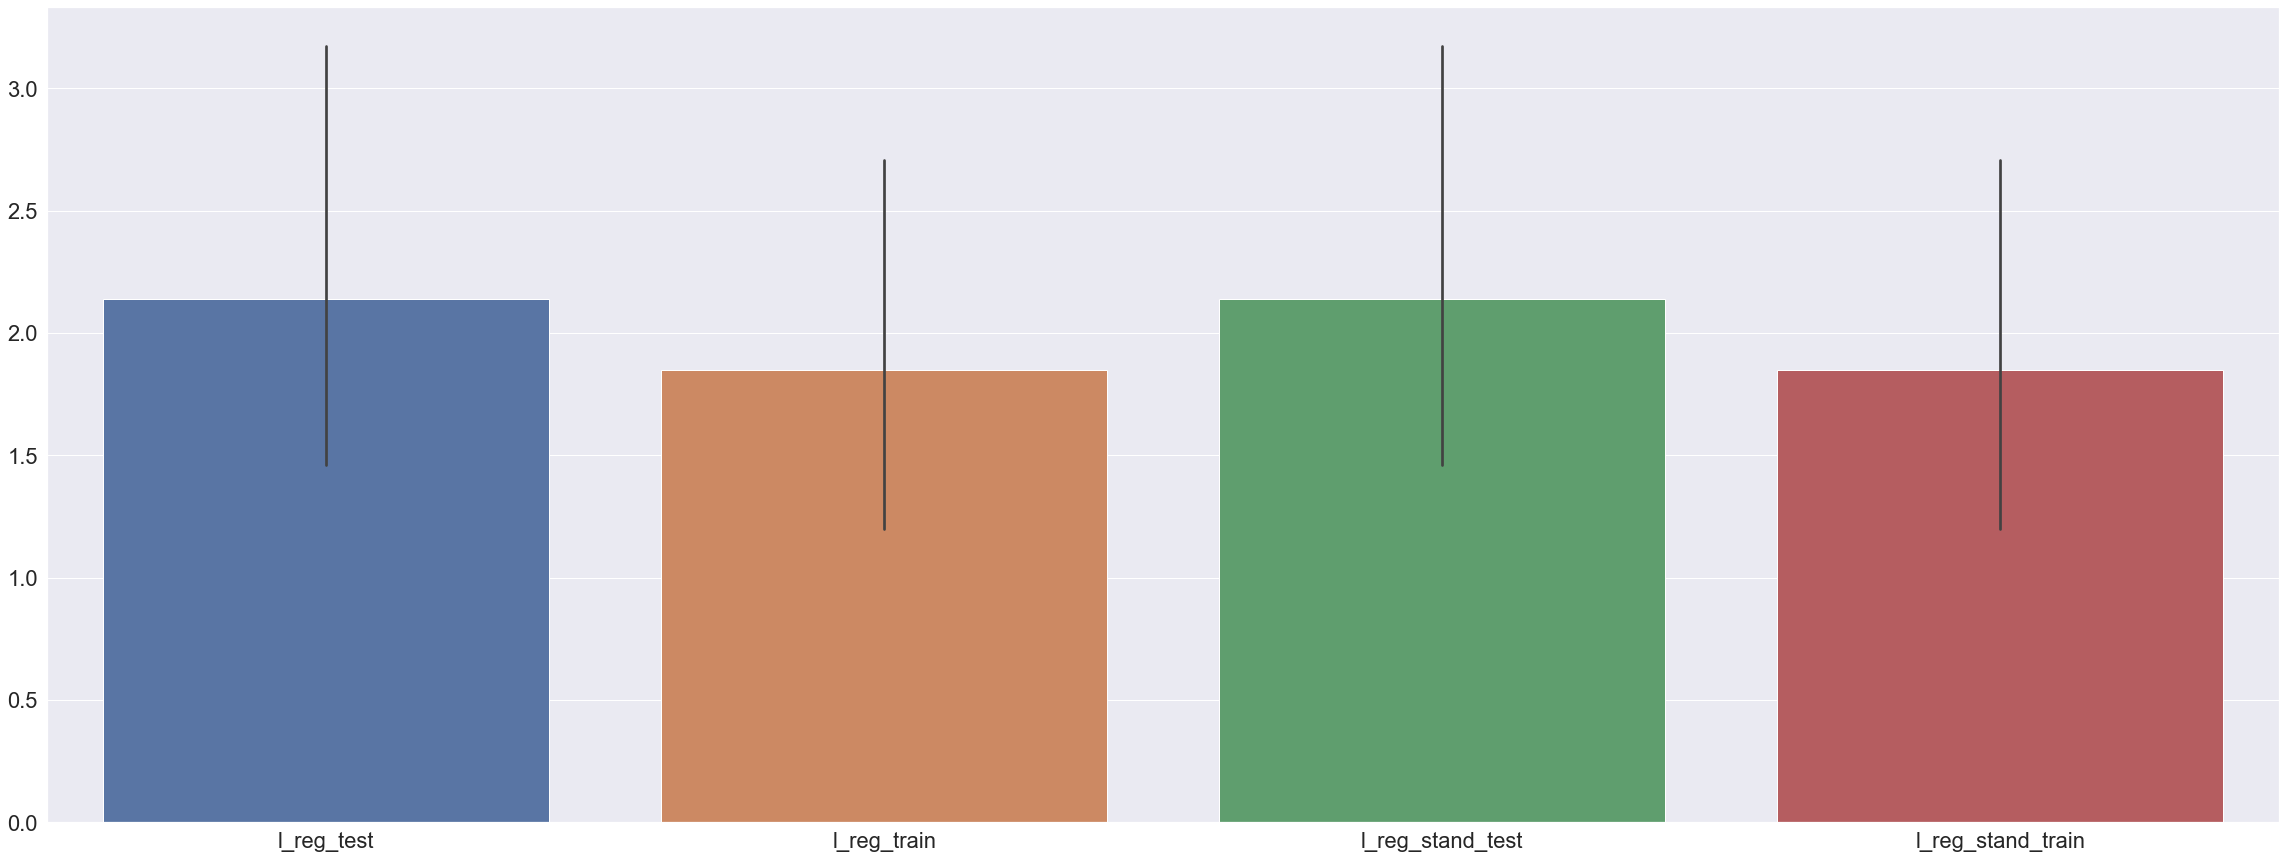

In [13]:
plot_errors(error_dictionary)

### No clear improvements after using the standardized data

### Now let's do Ridge Regression to try and see if we can get a better result by removing any possible overfitting

In [14]:
ridge_regression_model = RidgeCV()
ridge_regression_model.fit(X_train, y_train)

error_ridge_reg_test = get_eval_metrics(ridge_regression_model, X_train, X_test, y_train, y_test, True)
error_ridge_reg_train = get_eval_metrics(ridge_regression_model, X_train, X_test, y_train, y_test, False)

print_eval_metrics(error_ridge_reg_test, True)
print_eval_metrics(error_ridge_reg_train, False)

error_dictionary['r_reg_test'] = [error_ridge_reg_test[0], error_ridge_reg_test[1], error_ridge_reg_test[2]]
error_dictionary['r_reg_train'] = [error_ridge_reg_train[0], error_ridge_reg_train[1], error_ridge_reg_train[2]]

On Testing data => mae:1.4608456165997938, mse:3.1740727175811356, mrse:1.781592747397995
On Training data => mae:1.1985247885989458, mse:2.7051301722231704, mrse:1.6447279933846721


In [15]:
ridge_regression_model_stand = RidgeCV()
ridge_regression_model_stand.fit(X_train_standardized, y_train)

error_ridge_reg_test_stand = get_eval_metrics(ridge_regression_model_stand, X_train_standardized, X_test_standardized,
                                              y_train,
                                              y_test, True)
error_ridge_reg_train_stand = get_eval_metrics(ridge_regression_model_stand, X_train_standardized, X_test_standardized,
                                               y_train, y_test, False)

print_eval_metrics(error_ridge_reg_test_stand, True)
print_eval_metrics(error_ridge_reg_train_stand, False)

error_dictionary['r_reg_test_stand'] = [error_ridge_reg_test_stand[0], error_ridge_reg_test_stand[1],
                                        error_ridge_reg_test_stand[2]]
error_dictionary['r_reg_train_stand'] = [error_ridge_reg_train_stand[0], error_ridge_reg_train_stand[1],
                                         error_ridge_reg_train_stand[2]]

On Testing data => mae:1.461114839400791, mse:3.176032310274715, mrse:1.7821426178268436
On Training data => mae:1.1984916012396085, mse:2.70513805268281, mrse:1.6447303890555467


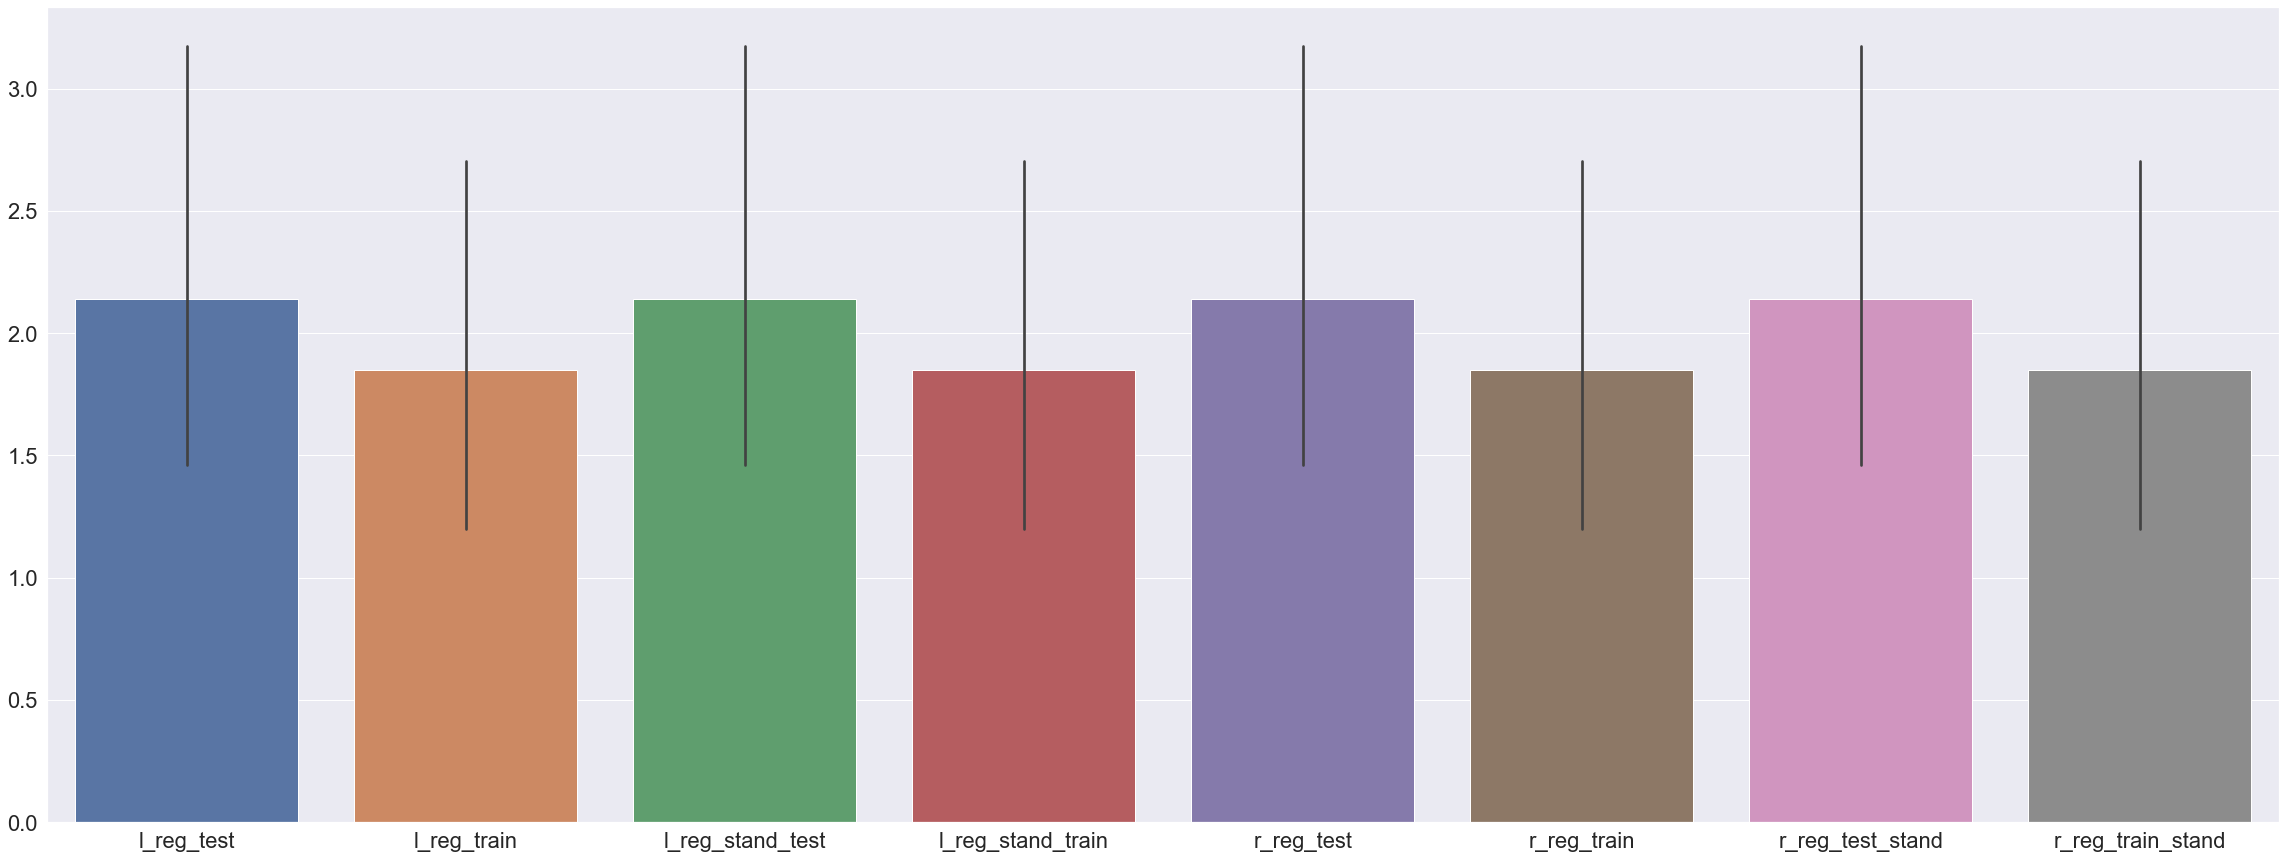

In [16]:
plot_errors(error_dictionary)

### Ridge regression doesn't seem to show any major improvements either

### This leads us to believe that there might not be any linear relationships between the data or that a higher order function would be better suited to fit our data, so let's try using Polynomial Regression but when we use polynomial regression we  have to be careful about which degree of complexity to choose. If it's too complex we might end up having an overfit model and if the degree is too low we might have a too simple model that fails to see the underlying patterns of the data.

In [17]:
def return_transformed_data(_X, degree):
    pf = PolynomialFeatures(degree=degree)
    return pf.fit_transform(_X)


def return_error_pred_complx():
    dict_err_complx = {
        'degree': [],
        'test_mae': [],
        'train_mae': [],
        'test_mse': [],
        'train_mse': [],
        'test_mrse': [],
        'train_mrse': [],

    }

    for i in range(1, 11):
        regressor = LinearRegression().fit(return_transformed_data(X_train, i), y_train)
        metrics_test = get_eval_metrics(regressor,
                                        _X_train=return_transformed_data(X_train, i),
                                        _X_test=return_transformed_data(X_test, i),
                                        _y_train=y_train,
                                        _y_test=y_test,
                                        for_test_set=True)
        metrics_train = get_eval_metrics(regressor,
                                         _X_train=return_transformed_data(X_train, i),
                                         _X_test=return_transformed_data(X_test, i),
                                         _y_train=y_train,
                                         _y_test=y_test,
                                         for_test_set=False)

        # return the mrse
        dict_err_complx['degree'].append(i)
        dict_err_complx['test_mae'].append(metrics_test[0])
        dict_err_complx['train_mae'].append(metrics_train[0])
        dict_err_complx['test_mse'].append(metrics_test[1])
        dict_err_complx['train_mse'].append(metrics_train[1])
        dict_err_complx['test_mrse'].append(metrics_test[2])
        dict_err_complx['train_mrse'].append(metrics_train[2])

    return dict_err_complx


In [18]:
err_complx = pd.DataFrame(return_error_pred_complx())
err_complx

,degree,test_mae,train_mae,test_mse,train_mse,test_mrse,train_mrse
0,1,1.460757,1.198468,3.174097e+00,2.705129,1.781600,1.644728
1,2,0.526179,0.408972,4.129102e-01,0.360397,0.642581,0.600330
2,3,0.388682,0.317702,2.945684e-01,0.216061,0.542742,0.464824
3,4,0.742071,0.316033,2.152185e+00,0.174803,1.467033,0.418094
4,5,2.469044,0.297468,7.707391e+01,0.137656,8.779175,0.371020
5,6,1.914337,0.258518,2.500980e+01,0.107262,5.000980,0.327510
6,7,22.487767,0.170024,9.749132e+03,0.050501,98.737694,0.224725
7,8,1492.419038,0.178804,5.403552e+07,0.071506,7350.885474,0.267407
8,9,17269.108388,0.588917,6.053271e+09,0.681687,77802.768683,0.825644
9,10,91658.812203,1.513776,2.273752e+11,4.972143,476838.795692,2.229830


### Some errors are too large so it's a good idea to standardize both train and test errors to be able to better compare them

In [19]:
scaler_mae = StandardScaler()
scaler_mae.fit(err_complx.loc[:, ['test_mae', 'train_mae']])
err_complx_standerdized_mae = scaler_mae.transform(err_complx.loc[:, ['test_mae', 'train_mae']])

In [20]:
err_complx['test_mse'] = err_complx_standerdized_mae[:, 0]
err_complx['train_mse'] = err_complx_standerdized_mae[:, 1]

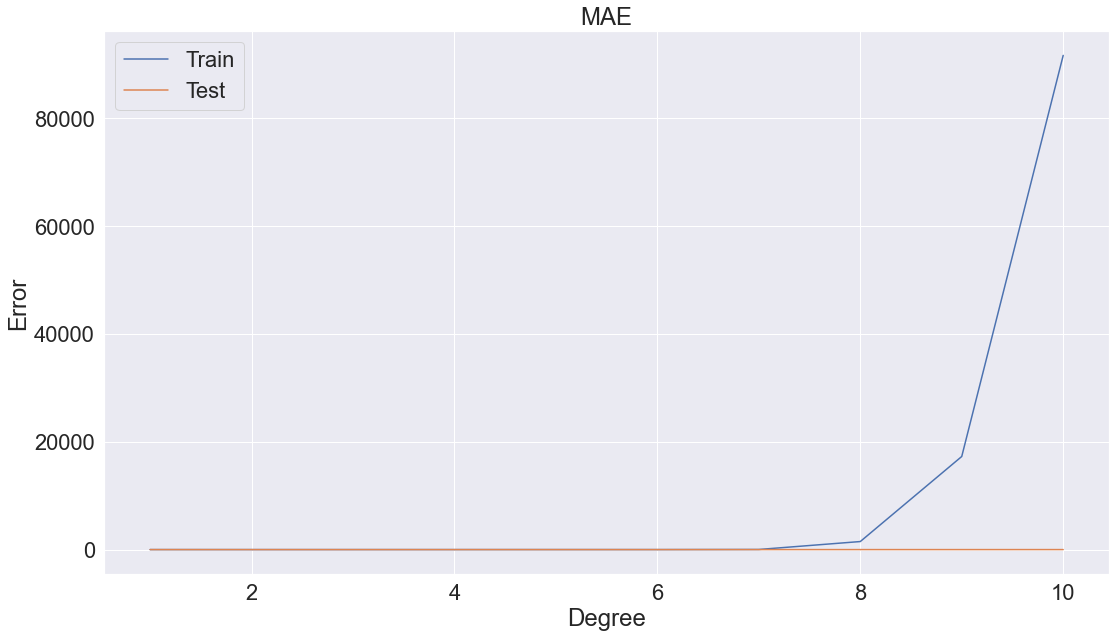

In [21]:
plt.figure(figsize=(18, 10))

plt.title('MAE')
sns.lineplot(x=err_complx['degree'], y=err_complx['test_mae'])
sns.lineplot(x=err_complx['degree'], y=err_complx['train_mae'])
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(labels=['Train', 'Test'])
plt.show()

In [22]:
scaler_mse = StandardScaler()
scaler_mse.fit(err_complx.loc[:, ['test_mse', 'train_mse']])
err_complx_standerdized_mse = scaler_mse.transform(err_complx.loc[:, ['test_mse', 'train_mse']])

In [23]:
err_complx['train_mse'] = err_complx_standerdized_mse[:, 0]
err_complx['test_mse'] = err_complx_standerdized_mse[:, 1]

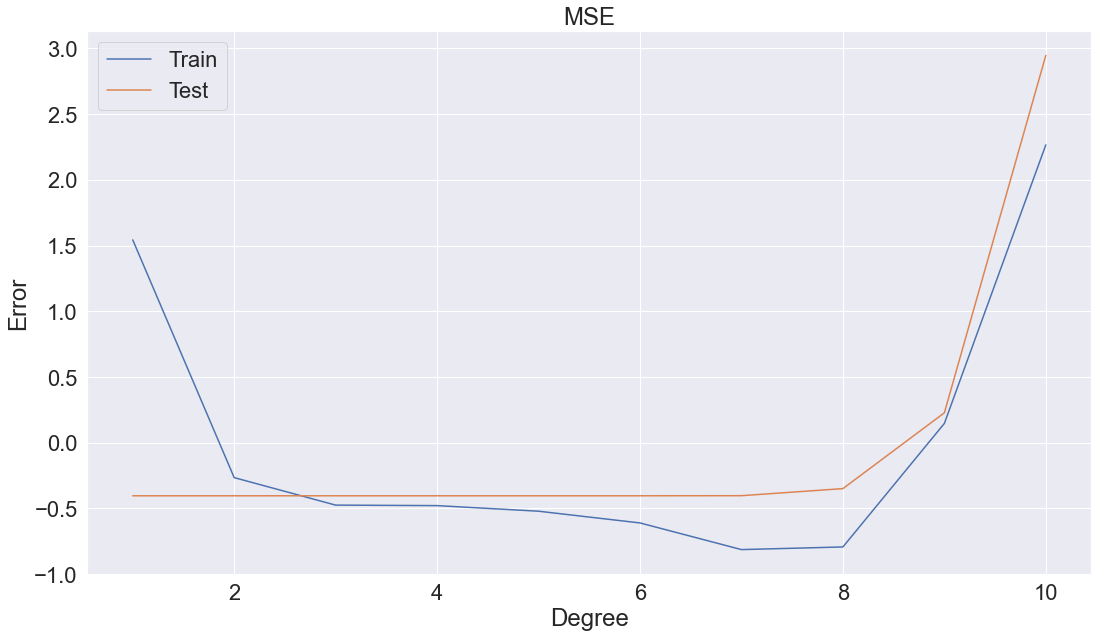

In [24]:
plt.figure(figsize=(18, 10))

plt.title('MSE')
sns.lineplot(x=err_complx['degree'], y=err_complx['test_mse'])
sns.lineplot(x=err_complx['degree'], y=err_complx['train_mse'])
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(labels=['Train', 'Test'])
plt.show()

In [25]:
scaler_mrse = StandardScaler()
scaler_mrse.fit(err_complx.loc[:, ['test_mrse', 'train_mrse']])
err_complx_standerdized_mrse = scaler_mrse.transform(err_complx.loc[:, ['test_mrse', 'train_mrse']])

In [26]:
err_complx['train_mrse'] = err_complx_standerdized_mrse[:, 0]
err_complx['test_mrse'] = err_complx_standerdized_mrse[:, 1]

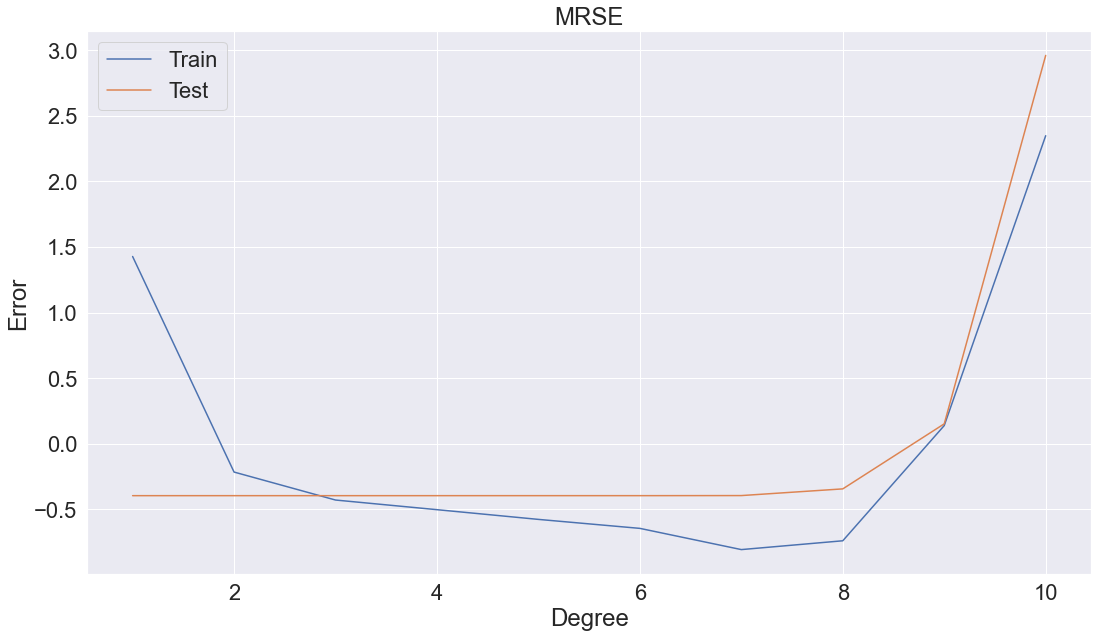

In [27]:
plt.figure(figsize=(18, 10))

plt.title('MRSE')
sns.lineplot(x=err_complx['degree'], y=err_complx['test_mrse'])
sns.lineplot(x=err_complx['degree'], y=err_complx['train_mrse'])
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(labels=['Train', 'Test'])
plt.show()

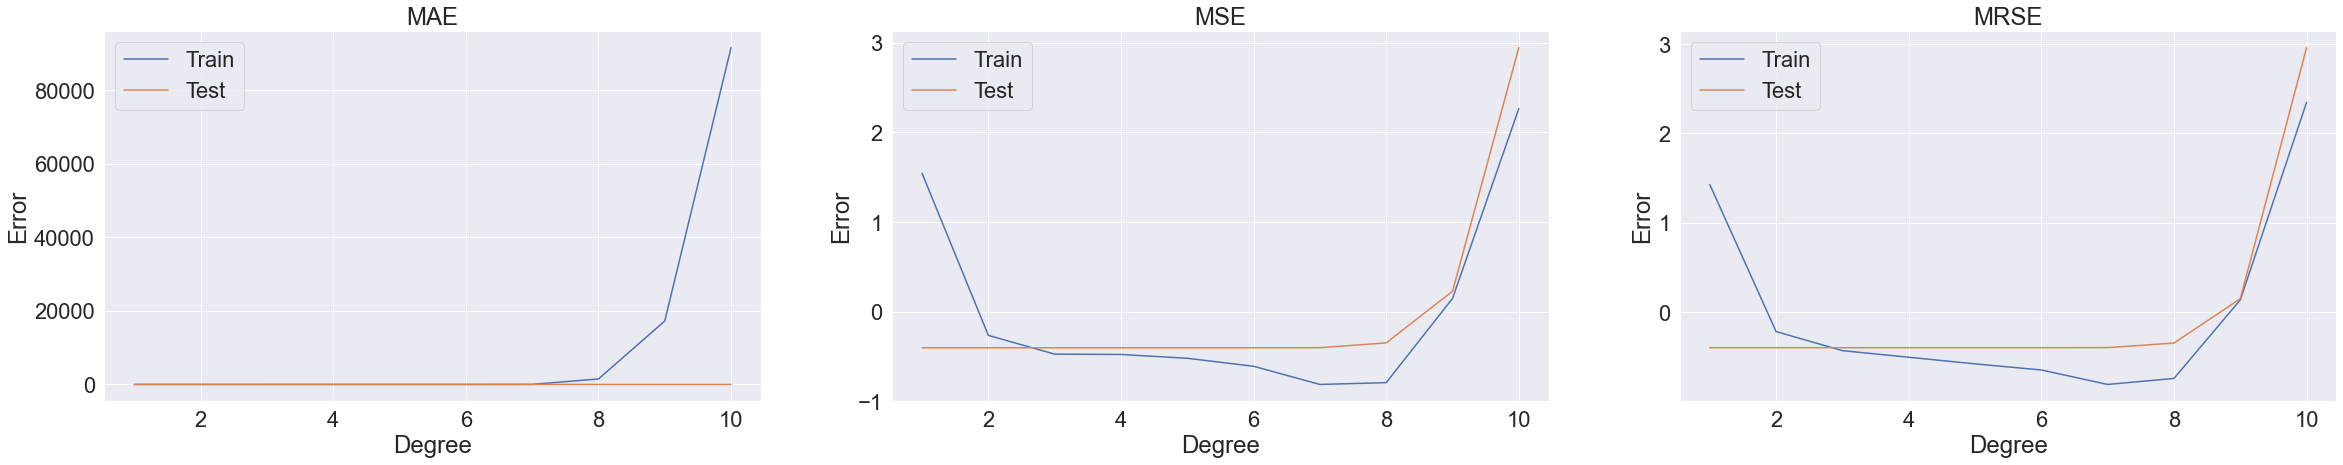

In [28]:
plt.figure(figsize=(40, 15))
plt.subplot(2, 3, 1)
plt.title('MAE')
sns.lineplot(x=err_complx['degree'], y=err_complx['test_mae'])
sns.lineplot(x=err_complx['degree'], y=err_complx['train_mae'])
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(labels=['Train', 'Test'])

plt.subplot(2, 3, 2)
plt.title('MSE')
sns.lineplot(x=err_complx['degree'], y=err_complx['test_mse'])
sns.lineplot(x=err_complx['degree'], y=err_complx['train_mse'])
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(labels=['Train', 'Test'])

plt.subplot(2, 3, 3)
plt.title('MRSE')
sns.lineplot(x=err_complx['degree'], y=err_complx['test_mrse'])
sns.lineplot(x=err_complx['degree'], y=err_complx['train_mrse'])
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(labels=['Train', 'Test'])

plt.show()

### From the error-complexity graphs we were able to deduce that for the polynomial regression, the complexity degree of $3$ will result in the best model performance so let's build a Polynomial regression model of complexity degree $3$

In [29]:
pf = PolynomialFeatures(degree=3)
X_train = pf.fit_transform(X_train)
X_test = pf.fit_transform(X_test)

poly_regression_model = LinearRegression()
poly_regression_model.fit(X_train, y_train);

In [30]:
error_poly_reg_test = get_eval_metrics(poly_regression_model, X_train, X_test, y_train, y_test, True)
error_poly_reg_train = get_eval_metrics(poly_regression_model, X_train, X_test, y_train, y_test, False)

print_eval_metrics(error_poly_reg_test, True)
print_eval_metrics(error_poly_reg_train, False)

error_dictionary['poly_reg_test'] = [error_poly_reg_test[0], error_poly_reg_test[1], error_poly_reg_test[2]]
error_dictionary['poly_reg_train'] = [error_poly_reg_train[0], error_poly_reg_train[1], error_poly_reg_train[2]]

On Testing data => mae:0.3886817048041567, mse:0.29456840904284876, mrse:0.5427415674543905
On Training data => mae:0.3177015419284961, mse:0.21606116397546887, mrse:0.46482379884798164


<a id="title-four"></a>
<h1 style='background:#001664; border:2; border-radius: 10px; color:white;padding:30px'><center>Final
Results</center></h1>

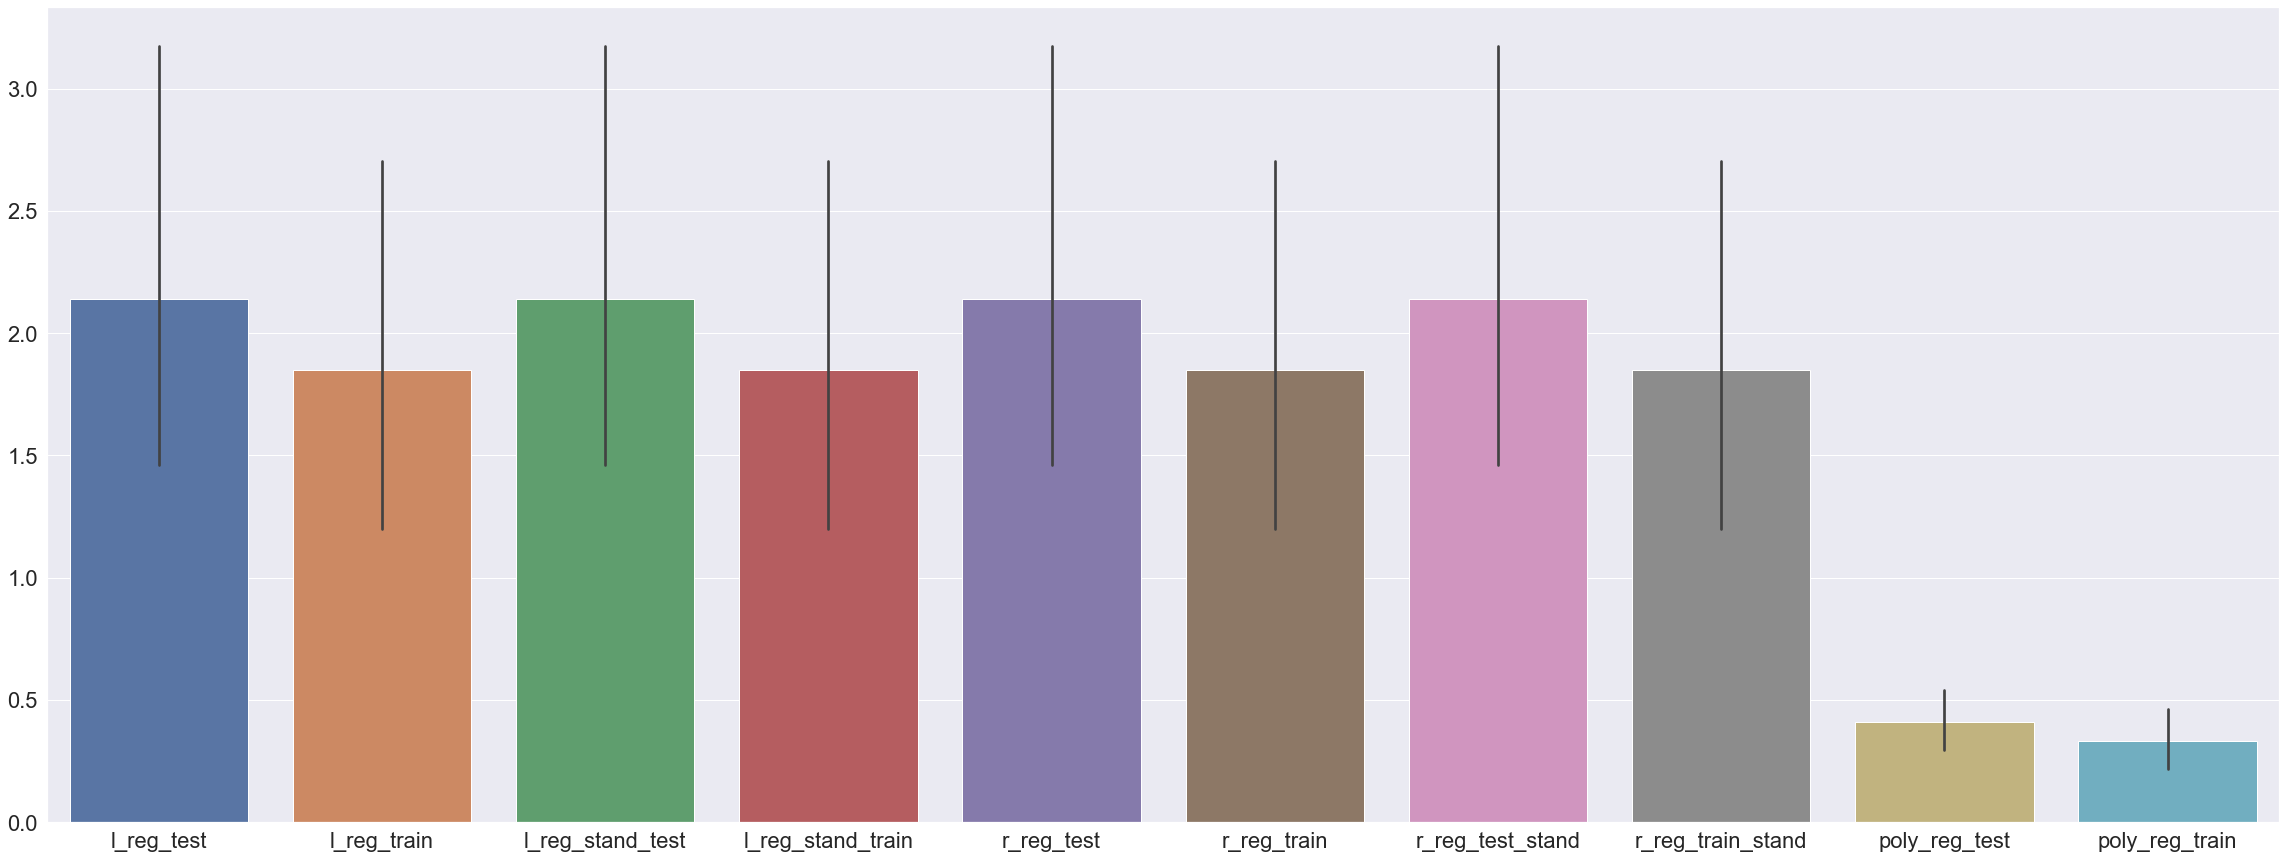

In [31]:
plot_errors(error_dictionary);

### As we can see, the polynomial model performs much better than the simple linear regression or the ridge regression, telling us that the problem with our baseline linear regression model wasn't that it overfit (as seen also by the lack of error change from the Ridge Regression model), but it was that alot of the features needed a more complex (higher degree model) to find the underlying patterns

<a id="title-five"></a>
<h1 style='background:#001664; border:2; border-radius: 10px; color:white;padding:30px'><center>Saving and Testing Model
</center></h1>

#### Saving and loading our optimal model

In [32]:
import pickle

filename = 'optimal_polyreg_model.sav'
pickle.dump(poly_regression_model, open(filename, 'wb'))

In [33]:
# load the model from disk
loaded_optimal_polyreg_model = pickle.load(open(filename, 'rb'))

#### Predicting expenditure for 149k on TV, 22k on Radio, and 12k on Newspaper Ads

In [34]:
x_new = [[149, 22, 12]]
x_new_poly_transformed = pf.fit_transform(x_new)
loaded_optimal_polyreg_model.predict(x_new_poly_transformed)

array([14.60022453])